In [47]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from numba import cuda, jit, int32, int64
import math 
import time 

**CPU implementation**

In [52]:
def CPU_bilateral(img, blur, d):
  result = []

  for i in img:
    result.append(np.zeros(len(img[0])))
    
  for x in range(d, img.shape[0] - d):
    for y in range(d, img.shape[1] - d):
      sum = 0
      counter = 0
      for i in range(x - d, x + d):
        for j in range(y - d, y + d):
          if abs(img[x][y] - img[i][j]) < blur:
            sum += img[i][j]
            counter += 1
          
      res = sum / counter
      result[x][y] = int(res)

  for x in range(d):
    for h in range(len(img)):
      result[h][x] = img[h][x]
      result[h][-x - 1] = img[h][-x - 1]

    for w in range(len(img[0])):
      result[x][w] = img[x][w]
      result[-x - 1][w] = img[-x - 1][w]

  return result

**GPU implementation**

In [53]:
def perform_GPU(img, blur, d):
  result = []
  for i in img:
    result.append(np.zeros(len(img[0])))
  
  buffer = [blur, d]

  img_copied = cuda.to_device(img)
  result_copied = cuda.to_device(result)
  buffer_copied = cuda.to_device(buffer)

  threads_in_block = (32, 32)
  blocks_in_grid = (math.ceil(img.shape[0] / threads_in_block[0]), math.ceil(img.shape[1] / threads_in_block[1]))

  GPU_bilateral[blocks_in_grid, threads_in_block](img_copied, result_copied, buffer_copied)

  result_from_GPU = result_copied.copy_to_host()
  
  for x in range(d):
    for h in range(len(img)):
      result_from_GPU[h][x] = img[h][x]
      result_from_GPU[h][-x - 1] = img[h][-x - 1]

    for w in range(len(img[0])):
      result_from_GPU[x][w] = img[x][w]
      result_from_GPU[-x - 1][w] = img[-x - 1][w]
  
  return result_from_GPU

In [54]:
@cuda.jit
def GPU_bilateral(img, result, buffer):
  idx = cuda.blockIdx.x * cuda.blockDim.x + cuda.threadIdx.x
  jdx = cuda.blockIdx.y * cuda.blockDim.y + cuda.threadIdx.y

  if idx < (img.shape[0]) - (buffer[1] * 2):
    if (jdx < img.shape[1]) - (buffer[1] * 2):
      x = idx + buffer[1]
      y = jdx + buffer[1]
      sum = 0
      counter = 0

      for i in range(x - buffer[1], x + buffer[1]):
        for j in range(y - buffer[1], y + buffer[1]): 
          
          if abs(img[x][y] - img[i][j]) < buffer[0]:
            sum += img[i][j]
            counter += 1

      result[x][y] = sum / counter

**Testing**

In [48]:
img_orig = cv2.imread('test.bmp')

**Original image**

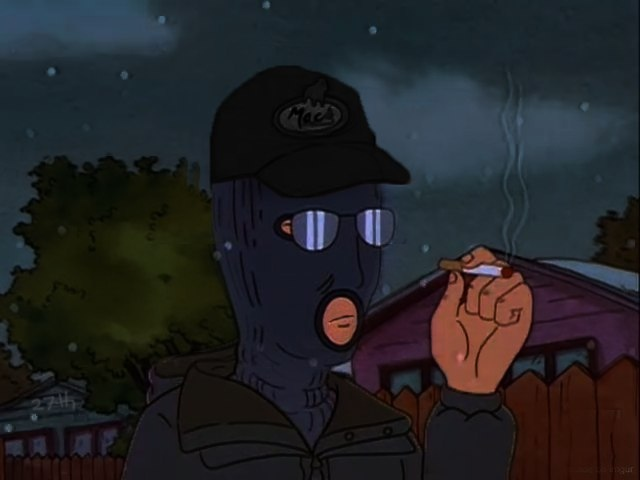

In [49]:
cv2_imshow(img_orig)

In [50]:
img = cv2.imread('test.bmp', cv2.IMREAD_GRAYSCALE)

**Grayscale image**

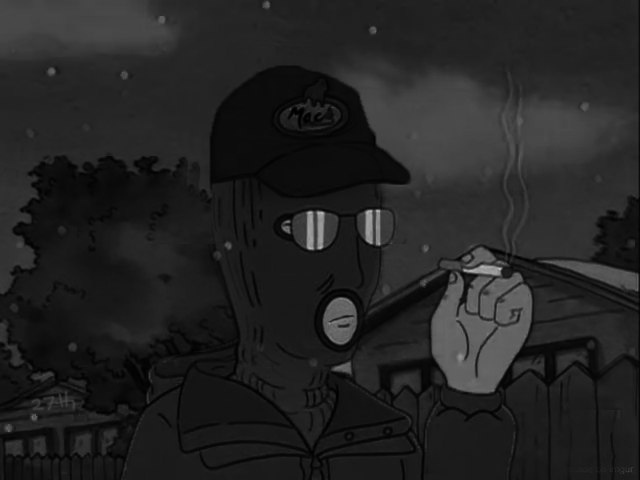

In [51]:
cv2_imshow(img)

CPU processing with parameters: 
blur =  10 
d =  1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in ubyte_scalars
  del sys.path[0]


Processed image from CPU:



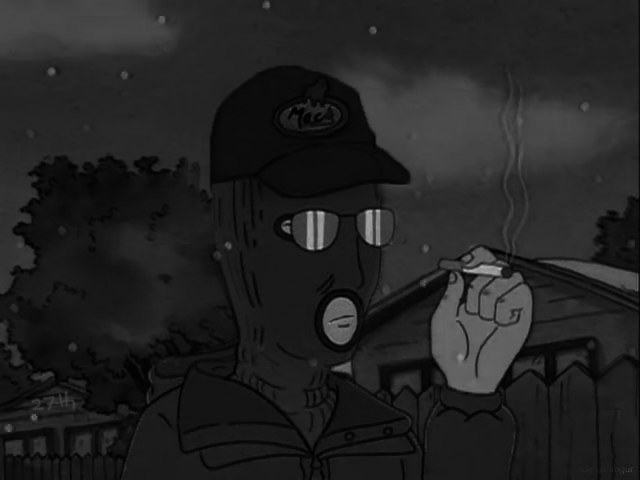

GPU processing with parameters: 
blur =  10 
d =  1
Processed image from GPU:



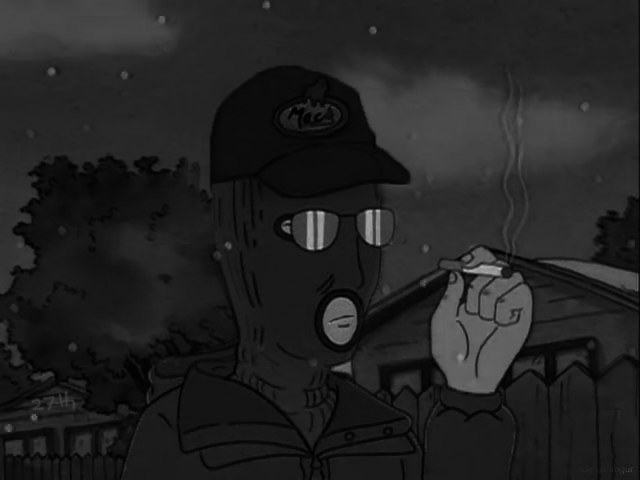


******************************************************************************************
Total time CPU:  4.976477384567261
Total time GPU:  0.010529279708862305
Acceleration (blur =  10 d =  1 ):  472.6322713583769
******************************************************************************************

CPU processing with parameters: 
blur =  10 
d =  2
Processed image from CPU:



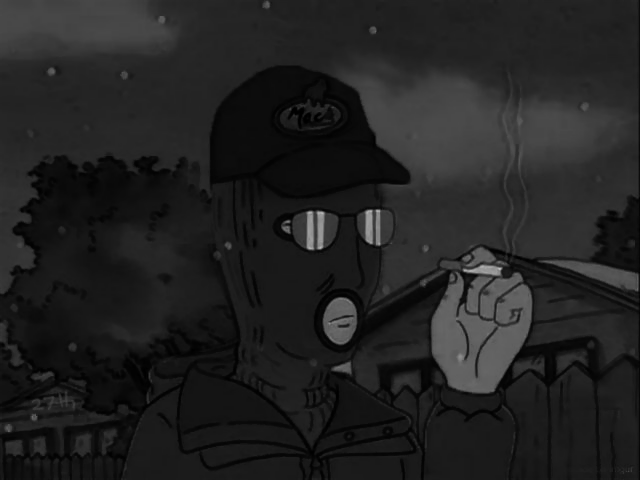

GPU processing with parameters: 
blur =  10 
d =  2
Processed image from GPU:



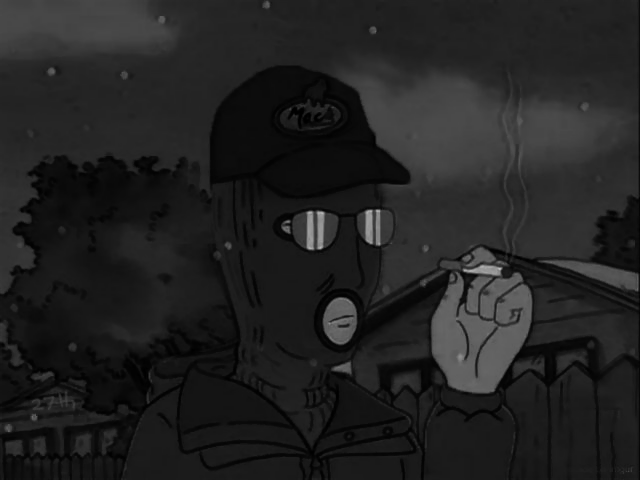


******************************************************************************************
Total time CPU:  15.715345621109009
Total time GPU:  0.01823592185974121
Acceleration (blur =  10 d =  2 ):  861.7796096068613
******************************************************************************************

CPU processing with parameters: 
blur =  10 
d =  3
Processed image from CPU:



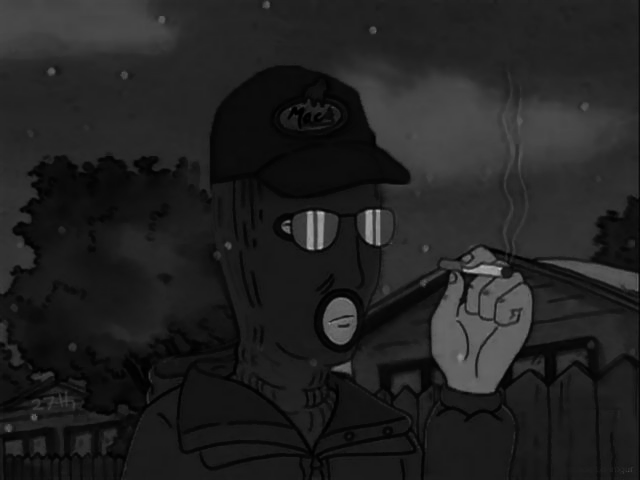

GPU processing with parameters: 
blur =  10 
d =  3
Processed image from GPU:



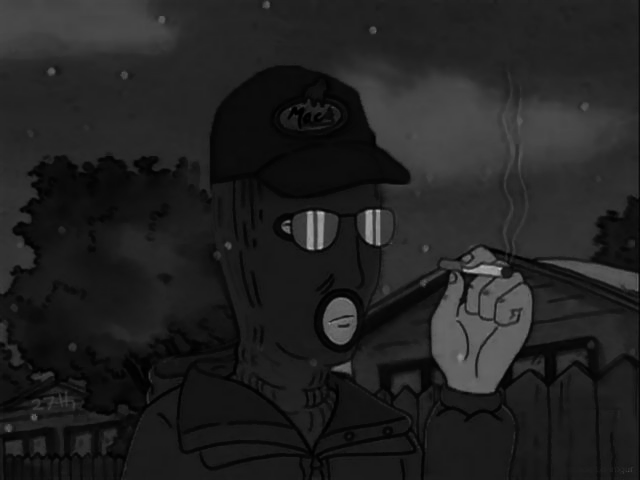


******************************************************************************************
Total time CPU:  33.980309009552
Total time GPU:  0.016757488250732422
Acceleration (blur =  10 d =  3 ):  2027.768631021825
******************************************************************************************

CPU processing with parameters: 
blur =  125 
d =  1
Processed image from CPU:



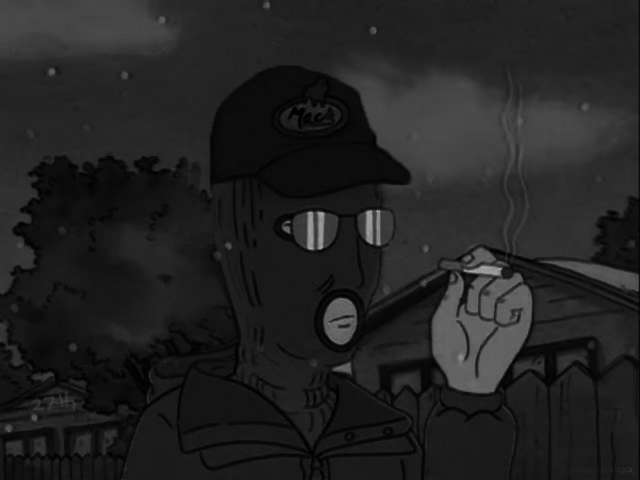

GPU processing with parameters: 
blur =  125 
d =  1
Processed image from GPU:



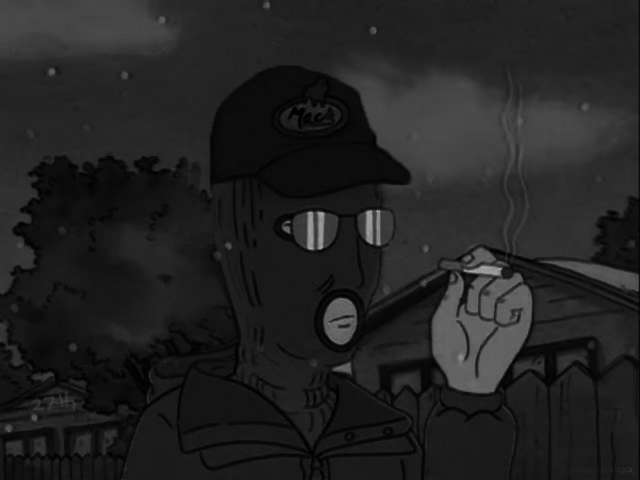


******************************************************************************************
Total time CPU:  4.587522506713867
Total time GPU:  0.014646053314208984
Acceleration (blur =  125 d =  1 ):  313.22585056161483
******************************************************************************************

CPU processing with parameters: 
blur =  125 
d =  2
Processed image from CPU:



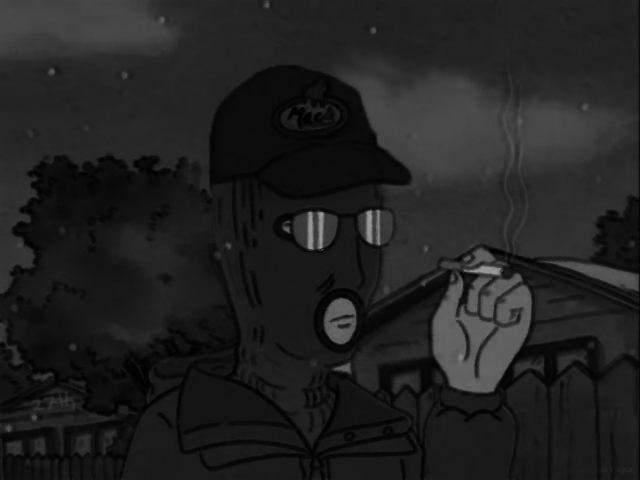

GPU processing with parameters: 
blur =  125 
d =  2
Processed image from GPU:



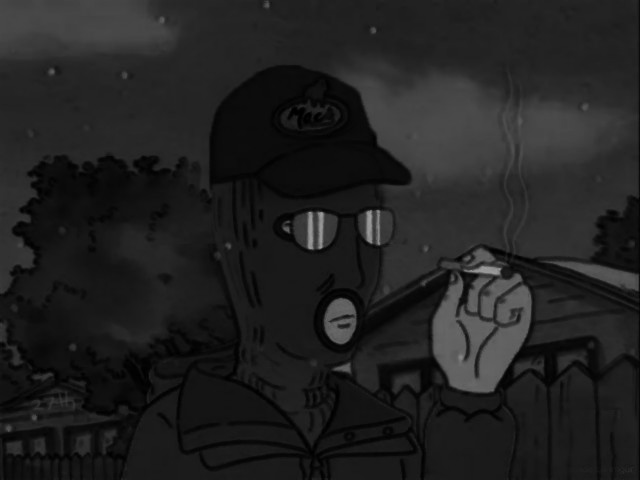


******************************************************************************************
Total time CPU:  15.588619709014893
Total time GPU:  0.0149078369140625
Acceleration (blur =  125 d =  2 ):  1045.6661015864893
******************************************************************************************

CPU processing with parameters: 
blur =  125 
d =  3
Processed image from CPU:



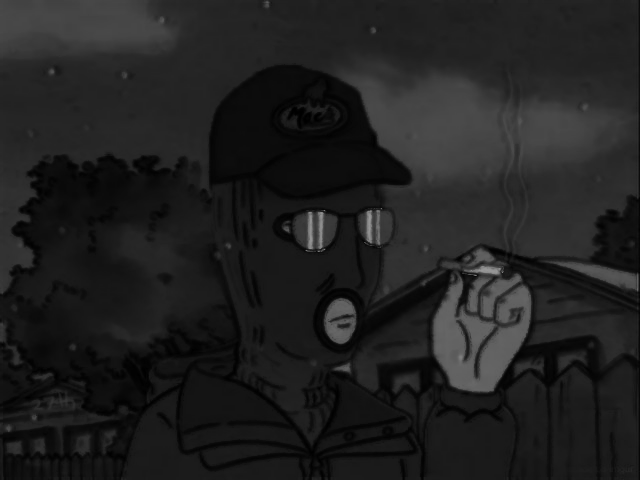

GPU processing with parameters: 
blur =  125 
d =  3
Processed image from GPU:



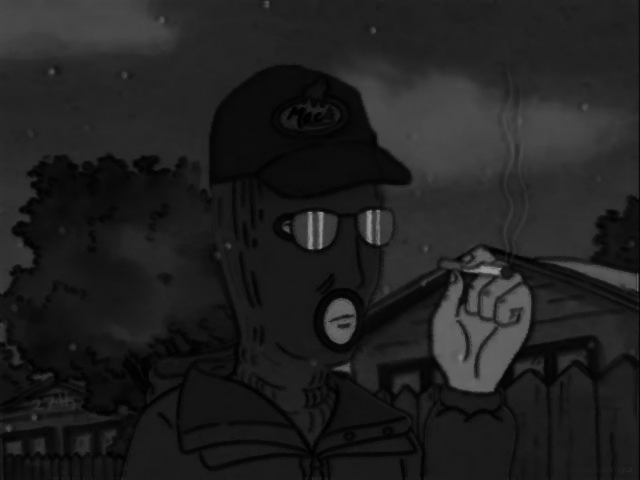


******************************************************************************************
Total time CPU:  34.64926862716675
Total time GPU:  0.016932010650634766
Acceleration (blur =  125 d =  3 ):  2046.3764960995804
******************************************************************************************

CPU processing with parameters: 
blur =  255 
d =  1
Processed image from CPU:



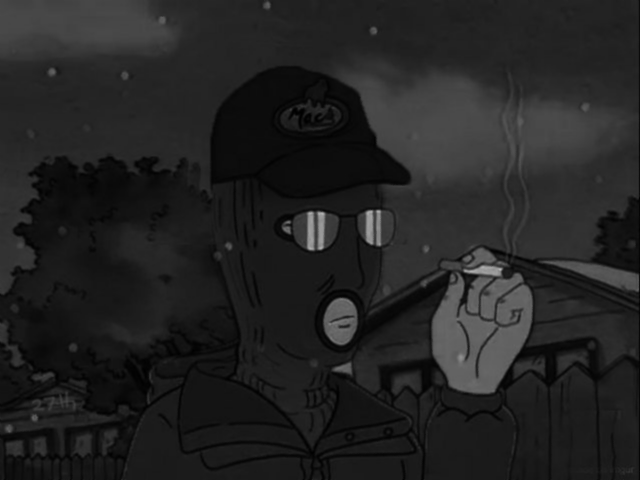

GPU processing with parameters: 
blur =  255 
d =  1
Processed image from GPU:



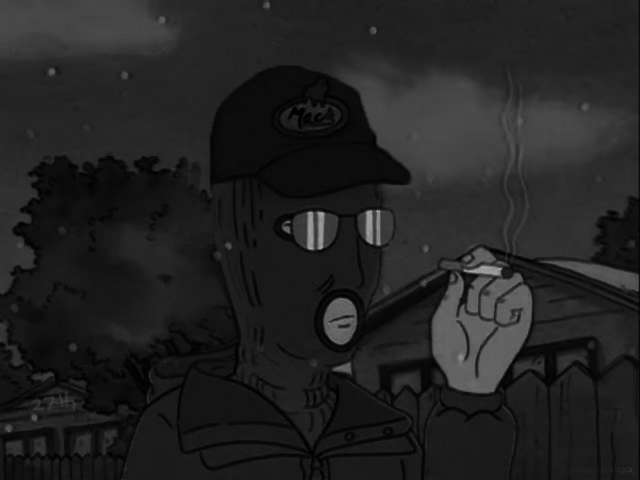


******************************************************************************************
Total time CPU:  4.920961141586304
Total time GPU:  0.012929201126098633
Acceleration (blur =  255 d =  1 ):  380.60829076693284
******************************************************************************************

CPU processing with parameters: 
blur =  255 
d =  2
Processed image from CPU:



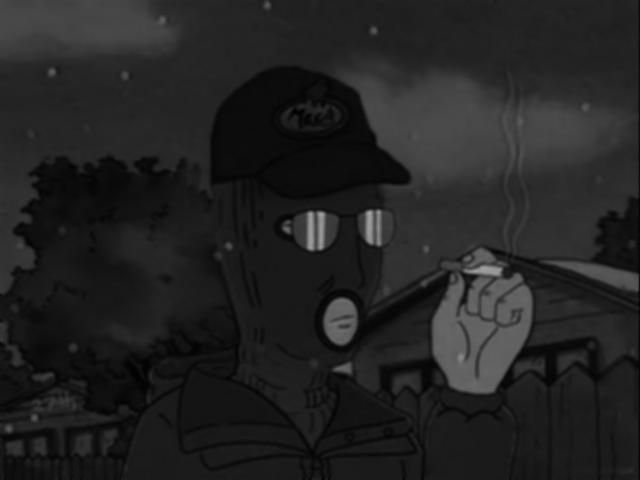

GPU processing with parameters: 
blur =  255 
d =  2
Processed image from GPU:



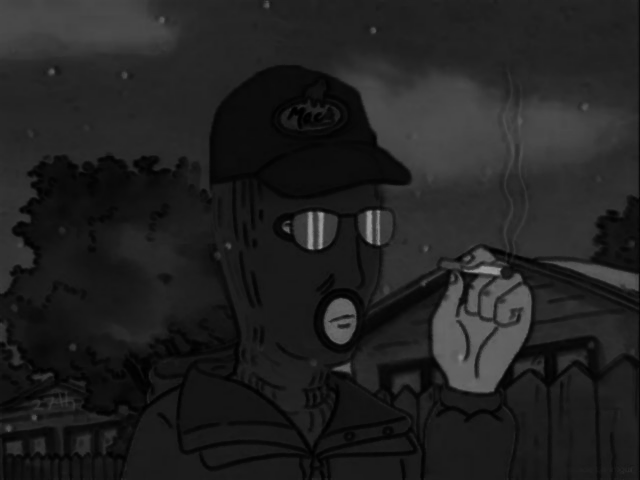


******************************************************************************************
Total time CPU:  17.709885597229004
Total time GPU:  0.014792203903198242
Acceleration (blur =  255 d =  2 ):  1197.244556194897
******************************************************************************************

CPU processing with parameters: 
blur =  255 
d =  3
Processed image from CPU:



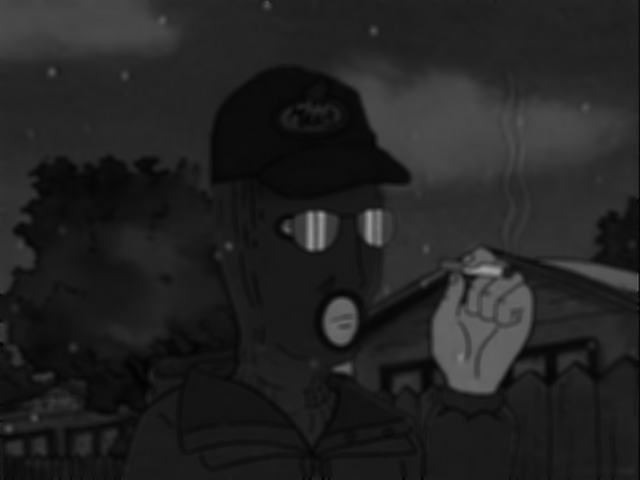

GPU processing with parameters: 
blur =  255 
d =  3
Processed image from GPU:



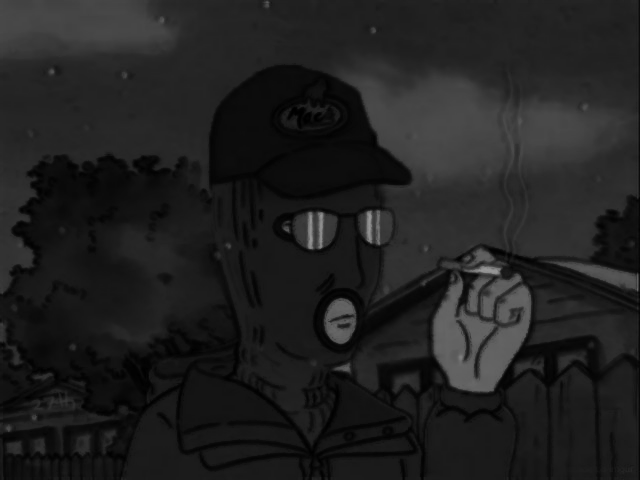


******************************************************************************************
Total time CPU:  35.92711019515991
Total time GPU:  0.020677804946899414
Acceleration (blur =  255 d =  3 ):  1737.472148877538
******************************************************************************************



In [57]:
blur = [10, 125, 255]
d = [1, 2, 3]

for i in blur:
  for j in d:
    print("CPU processing with parameters: \nblur = ", i, "\nd = ", j)
    start_time_CPU = time.time()
    result_cpu = np.array(CPU_bilateral(img, i, j))
    result_time_CPU = time.time() - start_time_CPU

    print("Processed image from CPU:\n")
    cv2_imshow(result_cpu)

    print("GPU processing with parameters: \nblur = ", i, "\nd = ", j)
    start_time_GPU = time.time()
    result_gpu = np.array(perform_GPU(img, i, j))
    result_time_GPU = time.time() - start_time_GPU

    print("Processed image from GPU:\n")
    cv2_imshow(result_gpu)

    print("\n******************************************************************************************")
    print("Total time CPU: ", result_time_CPU)
    print("Total time GPU: ", result_time_GPU)
    print("Acceleration (blur = ", i, "d = ", j, "): ", result_time_CPU / result_time_GPU)
    print("******************************************************************************************\n")